# 1. Load Data

In [232]:
import pandas as pd

In [233]:
# Read-in the raw wine data as a dataframe
df = pd.read_excel('Wine_data.xlsx')

# 2. Data Exploration

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [127]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


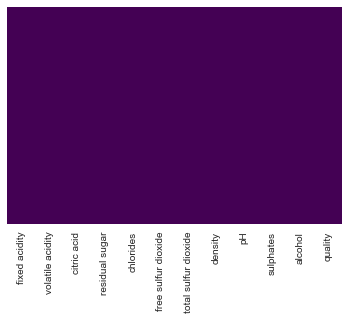

In [128]:
# Check for missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2de3a69d0>,
      dtype=object)

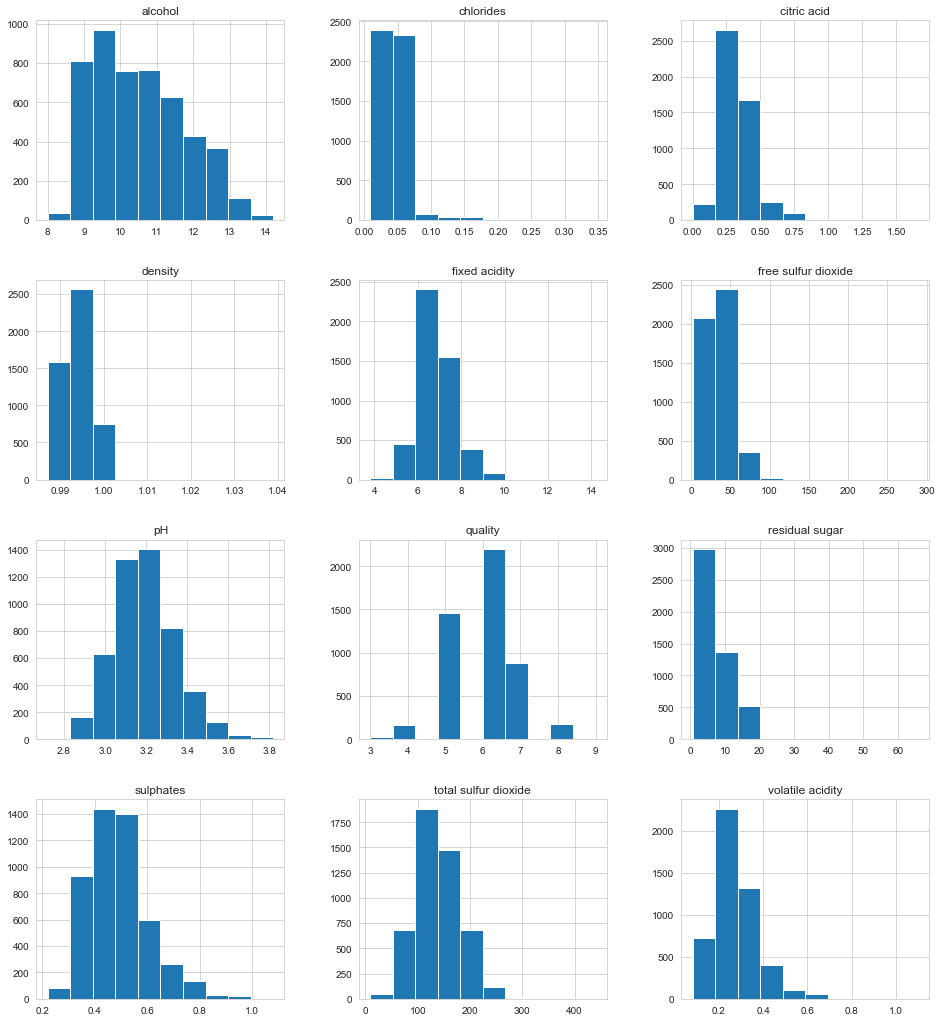

In [129]:
# Histograms to show distribution
df.hist(figsize=(16,18))

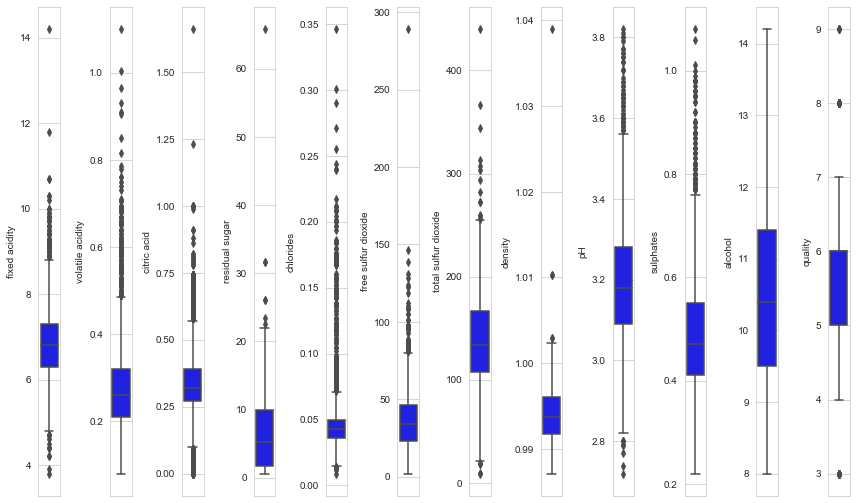

In [130]:
# Boxplots to show spread
cols = df.columns.values
num_rows = len(cols)-1/len(cols)
plt.figure(figsize=(len(cols), 7*num_rows))
for i in range(0,len(l)):
    plt.subplot(num_rows + 1,len(cols),i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[cols[i]],color='blue',orient='v')
    plt.tight_layout()

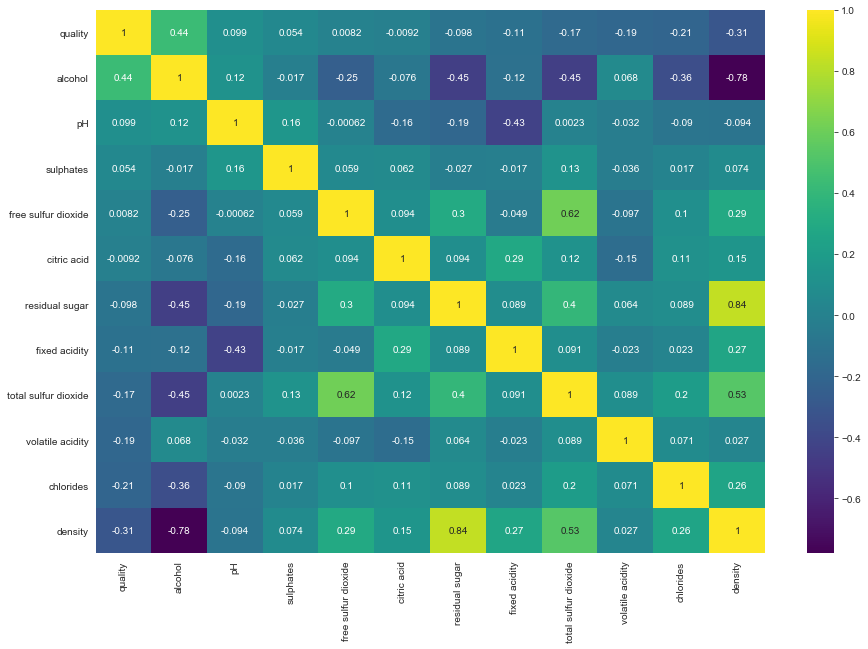

In [131]:
#Quality correlation matrix
k = len(df.columns.values)
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap='viridis')

# 3. Make Observations

* There are no missing values
* Most wine's were given quality ratings of 5 and 6 and no wine's were given ratings of 1, 2, and 10
* Significant outliers exist for all variables except for alcohol
* Outliers seem to be mostly larger
* Alcohol's distribution is irregular, though it doesn't have significant outliers
* Residual sugar's distribution is positively skewed

# 4. Data pre-processing

In [132]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [133]:
# Independent variables
x_df = df[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity']]
# Dependent variable
y_df = df[['quality']]
# Separate training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=0)

In [151]:
# Fit then apply the transformer to the training set, then apply the transformer to the test set
transformer = preprocessing.StandardScaler().fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

# 5. Regression

## Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression

In [218]:
# Initialize and fit model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
# Score the model
score = lreg.score(x_test, y_test)
print(f'Linear Regression Accuracy: {score}')

Linear Regression Accuracy: 0.25064167866277653


## Polynomial Regression

In [221]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [229]:
# Initialize and fit custom model (using pipeline)
preg = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
preg.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [230]:
# Score the model
score = preg.score(x_test, y_test)
print(f'Polynomial Regression Accuracy: {score}')

Polynomial Regression Accuracy: 0.3013463017839531


# 6. Decision Tree Classification

In [213]:
# Predict quality of wine based off of chemical properties. Apply tree-based methods (decision tree classifier)
from sklearn.tree import DecisionTreeClassifier

In [214]:
# Initialize and fit model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [215]:
# Score the model
score = clf.score(x_test, y_test)
print(f'Decision Tree Classification Accuracy: {score}')

Decision Tree Classification Accuracy: 0.5387755102040817


# 7. Unsupervised Analysis - Random Forest

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
# Initialize and fit model
clf = RandomForestClassifier(max_depth=150, random_state=0)
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [212]:
# Score the model
score = clf.score(x_test, y_test)
print(f'Random Forest Accuracy: {score}')

Random Forest Accuracy: 0.6479591836734694


# 8. Nearest Neighbor Classification

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [209]:
# Initialize and fit model (test with differen n_neighbors values)
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [211]:
# Score the model
score = neigh.score(x_test, y_test)
print(f'KNN Accuracy: {score}')

KNN Accuracy: 0.5642857142857143


# 9. Conclusions

It appears that the quality of wine is not directly correlated with its chemical properties. Don't wine about it!